# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.defualt='colab'

## Importing the Dataset & Exploring it

In [ ]:
df= pd.read_csv('ZM.csv')

In [ ]:
#read_csv function from pandas

In [ ]:


















df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-23,432.010010,436.513000,417.880005,430.279999,430.279999,8486000
1,2020-11-24,421.505005,438.832001,420.010010,427.549988,427.549988,6148400
2,2020-11-25,435.850006,448.480011,433.329987,443.720001,443.720001,8763700
3,2020-11-27,453.989990,472.040009,449.000000,471.609985,471.609985,7276400
4,2020-11-30,485.700012,486.829987,460.000000,478.359985,478.359985,16646500
...,...,...,...,...,...,...,...
246,2021-11-15,255.000000,265.329987,255.000000,263.709991,263.709991,3994900
247,2021-11-16,263.000000,268.880005,261.209991,264.489990,264.489990,1972000
248,2021-11-17,264.000000,266.190002,261.519989,263.709991,263.709991,2417300
249,2021-11-18,260.880005,263.500000,254.580002,255.750000,255.750000,2353700


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,341.043212,347.616155,333.697828,340.510956,340.510956,4.428252e+06
std,50.327766,51.471692,48.035764,49.974935,49.974935,3.403661e+06
min,248.380005,253.190002,245.160004,247.600006,247.600006,1.437600e+06
25%,298.922500,305.479995,293.604995,300.104995,300.104995,2.593750e+06
50%,342.010010,347.399994,333.690002,340.809998,340.809998,3.436200e+06
75%,380.654999,386.559998,372.260010,378.774993,378.774993,5.006900e+06
max,485.700012,486.829987,460.000000,478.359985,478.359985,3.458290e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

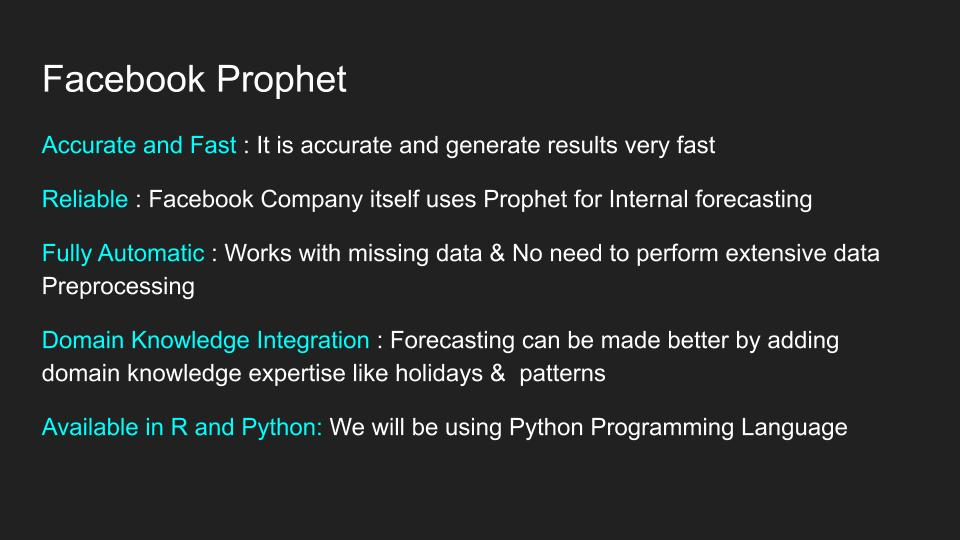

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-23,432.010010,436.513000,417.880005,430.279999,430.279999,8486000
1,2020-11-24,421.505005,438.832001,420.010010,427.549988,427.549988,6148400
2,2020-11-25,435.850006,448.480011,433.329987,443.720001,443.720001,8763700
3,2020-11-27,453.989990,472.040009,449.000000,471.609985,471.609985,7276400
4,2020-11-30,485.700012,486.829987,460.000000,478.359985,478.359985,16646500
...,...,...,...,...,...,...,...
246,2021-11-15,255.000000,265.329987,255.000000,263.709991,263.709991,3994900
247,2021-11-16,263.000000,268.880005,261.209991,264.489990,264.489990,1972000
248,2021-11-17,264.000000,266.190002,261.519989,263.709991,263.709991,2417300
249,2021-11-18,260.880005,263.500000,254.580002,255.750000,255.750000,2353700


In [ ]:
columns=['Date','Close']
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2020-11-23,430.279999
1,2020-11-24,427.549988
2,2020-11-25,443.720001
3,2020-11-27,471.609985
4,2020-11-30,478.359985
...,...,...
246,2021-11-15,263.709991
247,2021-11-16,264.489990
248,2021-11-17,263.709991
249,2021-11-18,255.750000


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close': 'y'})

In [ ]:
prophet_df

,ds,y
0,2020-11-23,430.279999
1,2020-11-24,427.549988
2,2020-11-25,443.720001
3,2020-11-27,471.609985
4,2020-11-30,478.359985
...,...,...
246,2021-11-15,263.709991
247,2021-11-16,264.489990
248,2021-11-17,263.709991
249,2021-11-18,255.750000


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-23,418.689643,386.348082,450.653593,418.689643,418.689643,-1.354196,-1.354196,-1.354196,-1.354196,-1.354196,-1.354196,0.0,0.0,0.0,417.335446
1,2020-11-24,418.082834,385.082111,446.464270,418.082834,418.082834,-1.190655,-1.190655,-1.190655,-1.190655,-1.190655,-1.190655,0.0,0.0,0.0,416.892179
2,2020-11-25,417.476025,382.303971,445.593271,417.476025,417.476025,-4.778045,-4.778045,-4.778045,-4.778045,-4.778045,-4.778045,0.0,0.0,0.0,412.697981
3,2020-11-27,416.262408,384.414129,449.520359,416.262408,416.262408,0.695304,0.695304,0.695304,0.695304,0.695304,0.695304,0.0,0.0,0.0,416.957712
4,2020-11-30,414.441982,383.382841,446.211525,414.441982,414.441982,-1.354196,-1.354196,-1.354196,-1.354196,-1.354196,-1.354196,0.0,0.0,0.0,413.087786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-12-15,215.294362,178.060167,242.066992,212.000886,218.566963,-4.778045,-4.778045,-4.778045,-4.778045,-4.778045,-4.778045,0.0,0.0,0.0,210.516317
277,2021-12-16,214.252381,179.099309,242.933499,210.738740,217.758087,-4.245373,-4.245373,-4.245373,-4.245373,-4.245373,-4.245373,0.0,0.0,0.0,210.007008
278,2021-12-17,213.210400,182.104851,245.055345,209.516681,217.115391,0.695304,0.695304,0.695304,0.695304,0.695304,0.695304,0.0,0.0,0.0,213.905704
279,2021-12-18,212.168419,184.495806,249.756939,208.223824,216.259401,5.436483,5.436483,5.436483,5.436483,5.436483,5.436483,0.0,0.0,0.0,217.604901


In [ ]:
px.line(forecast,x='ds',y='yhat')

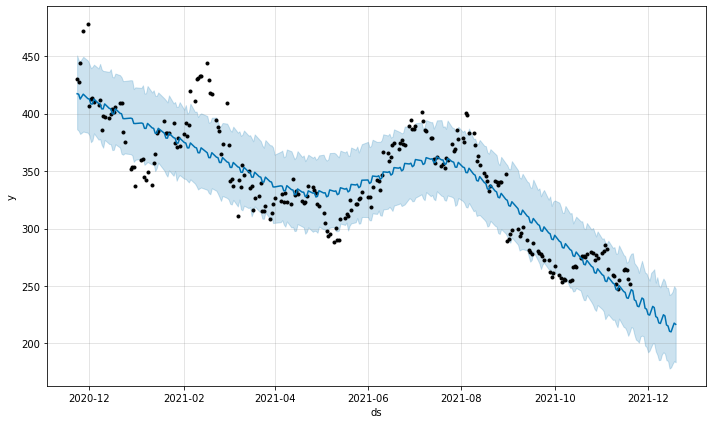

In [ ]:
figure= m.plot(forecast,xlabel='ds',ylabel='y')

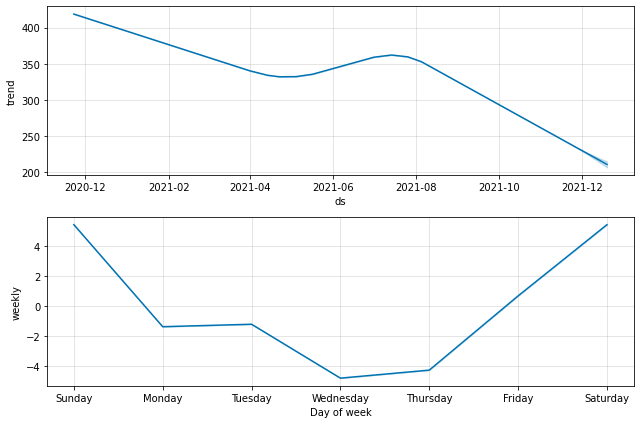

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forcast.csv')
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>